In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

###### テストデータを生成

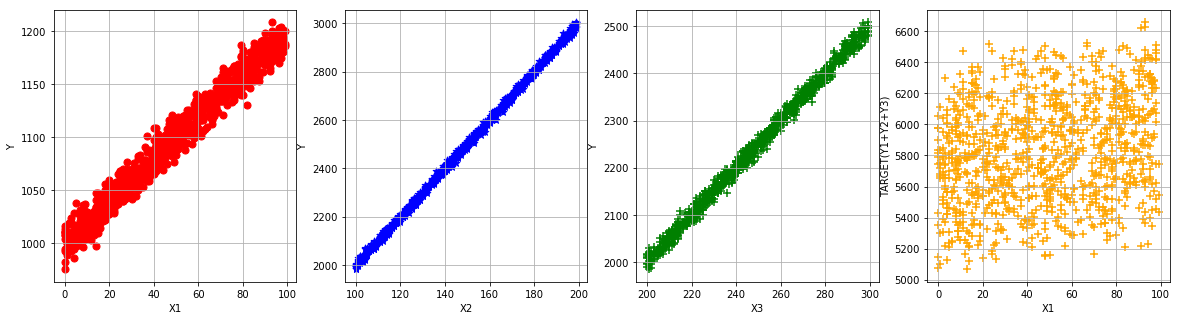

In [246]:
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
A = 2
B = 1000
X1 = np.array(np.random.randint(0, 100, 1000))
Y1 = np.array((X1 * A + B) + 10*np.random.randn(X1.shape[0]))


A = 10
B = 1000
X2 = np.array(np.random.randint(100, 200, 1000))
Y2 = np.array((X2 * A + B) + 10*np.random.randn(X2.shape[0]))

A = 5
B = 1000
X3 = np.array(np.random.randint(200, 300, 1000))
Y3 = np.array((X3 * A + B) + 10*np.random.randn(X3.shape[0]))

#print(Y1)

data = pd.DataFrame()
data["TARGET"] = Y1 + Y2 + Y3
data["Y1"] = Y1
data["Y2"] = Y2
data["Y3"] = Y3
data["X1"] = X1
data["X2"] = X2
data["X3"] = X3

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.scatter(data["X1"], data["Y1"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.scatter(data["X2"], data["Y2"], s=50, marker='*', color='b')             
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X3')
ax3.set_ylabel('Y')
ax3.scatter(data["X3"], data["Y3"], s=50, marker='+', color='green')
ax3 = plt.subplot2grid((1, 4), (0, 3))
ax3.grid(True)
ax3.set_xlabel('X1')
ax3.set_ylabel('TARGET(Y1+Y2+Y3)')
ax3.scatter(data["X1"], data["TARGET"], s=50, marker='+', color='orange')

##### py fileからclassをimpiort

In [54]:
#とりあえず特徴量X1、ターゲットY1のみで学習を行う。
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1"]].values, data["Y1"].values, test_size=0.4, random_state=None)

In [7]:
from utils import ScratchLinearRegression as cLinearRegression

In [55]:
regr = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=True, verbose=True)

In [56]:
regr.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[7]
 [8]]
Theta:
[[998.18242397]
 [  2.0373562 ]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [53 57 71 ... 72 60 26]]
Target:
[1106.85599449 1139.91856526 1141.75504066 1193.0116323  1010.51623798
 1054.41041004 1128.21230726 1168.97864481 1129.72875249 1043.79323686
 1186.01667722 1098.14214268 1164.53399712 1048.75729458 1034.86265611
 1177.70915147 1160.86875446 1127.36681009 1028.95653801 1069.11094162
 1175.87314206  993.01917037 1183.80113058 1108.99922706 1040.97078924
 1183.15972822 1186.47359496 1188.32163547 1110.29506455 1148.93132166
 1070.28632191 1180.71698257 1042.67922106  993.35345036 1049.46673581
 1053.67569281 1063.41290091 1075.90374927 1168.84975157 1020.37056141
 1050.35138715 1159.83805846 1081.41574524 1168.06244192 1148.94303297
 1034.57782111 1078.12585194 1061.27287396 1155.01831268 1034.34024293
 1030.24421072 1112.34901562 1034.25738367 1111.4257443  1078.69085634
 1215.4012125  1060.4505814  1093.70882884 1199.13653217 1055.85358817
 1060.44354494

###### (X1, Y1)予測結果 
Theta result = [997.8, 2.0]  
"Y1 = 2*X1+1000"なので期待通りの結果となった。

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


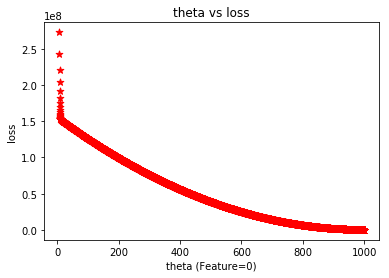

In [57]:
regr.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


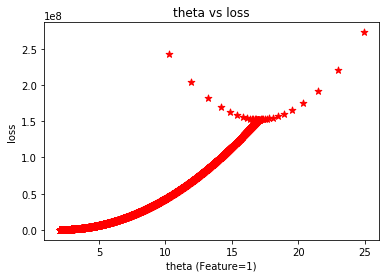

In [58]:
regr.plot_theta_loss(1)

#### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

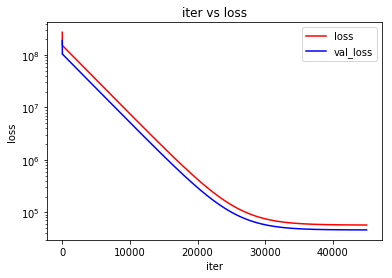

In [59]:
regr.plot_loss()

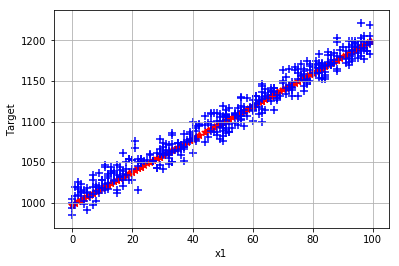

In [12]:
result = regr.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

In [247]:
#特徴量３つでやってみる
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1","X2","X3"]].values, data["TARGET"].values, test_size=0.4, random_state=None)

In [248]:
regr2 = cLinearRegression.ScratchLinearRegression(num_iter=10000000, lr=0.0000205, bias=True, verbose=True)

In [249]:
regr2.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[8]
 [4]
 [4]
 [2]]
Theta:
[[2.55532653e+03]
 [2.10589477e+00]
 [1.07964569e+01]
 [6.27318626e+00]]
Feature:
[[  1   1   1 ...   1   1   1]
 [ 71  78  53 ...  32  20  82]
 [131 105 166 ... 134 170 199]
 [239 232 275 ... 208 247 244]]
Target:
[5677.16700681 5386.90175204 6136.32459389 6125.3579405  5846.16132514
 6438.270445   6280.07397168 5873.34107857 5551.18789691 5426.74128297
 6344.29264585 5516.18212228 5475.79080439 5820.15232477 5582.04270205
 5432.04803868 6201.20832082 5817.48540792 5636.27007739 5749.67394791
 6028.94088691 5465.53099622 6105.16419001 5717.20500929 5949.96390778
 6192.48041075 6053.49879013 5876.9178898  6047.5939387  5542.38911565
 6468.82419569 5716.38873354 5748.64376695 5872.47557482 6374.07399701
 5167.36109251 5573.4475275  5661.10970361 5833.70239394 5698.28100435
 5897.96899766 6094.72198842 6163.98884602 5864.32830291 5879.17802311
 6000.58514713 5606.14028888 5677.44607452 6429.17970947 5428.4651624
 5949.55418745 6091.68494513 6252

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


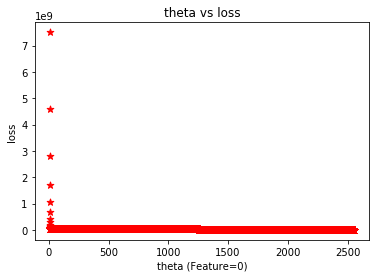

In [250]:
#バイアス成分　θ
regr2.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


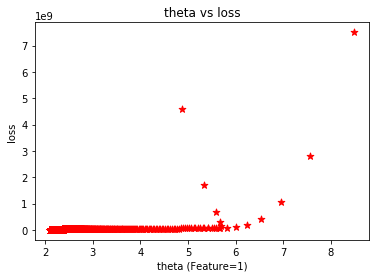

In [251]:
#X1成分　θ
regr2.plot_theta_loss(1)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


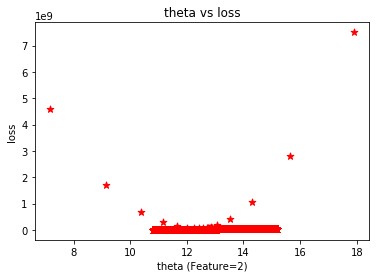

In [252]:
#X2成分　θ
regr2.plot_theta_loss(2)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


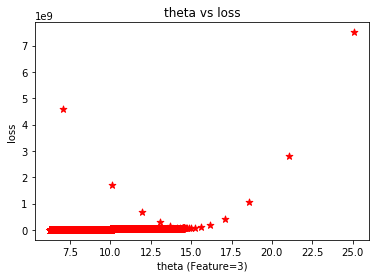

In [253]:
#X3成分　θ
regr2.plot_theta_loss(3)

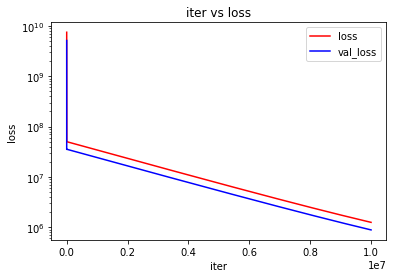

In [254]:
regr2.plot_loss()

計算時間を犠牲にして学習回数をあげれば値が収束する。

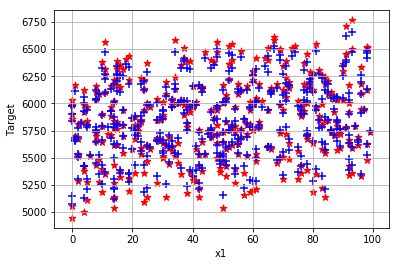

In [255]:
result = regr2.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

予測値の方が実際の値に比べバラツキが大きい（Target軸方向に幅が広い）。学習回数をあげれば値が収束すると考えられる。

##### その他　メモ
1. 学習率の値によってθが収束しなくなる。特に学習率が大きい場合
2. 今回検証に用いたデータの場合、θが収束する学習率はとても小さく学習に時間がかかる。（特徴量３つ使った場合、10000000回程必要）
3. θの初期値の決め方に何か工夫ができないか？（今回は1~10の乱数とした）
4. 線形回帰でθが収束する場合、必ず２乗曲線に乗るので、θを数点算出したら関数の形を予測することはできないだろうか？
5. 学習率意外に値の収束の速さは何で決まるか？（1000個程度の綺麗な線形なデータしかも特徴量1つでさえ40000回ほどループを回す必要があるのはなぜか？）

#### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 θ0を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [19]:
#簡単のため特徴量：X1, ターゲット：Y1のみを使って検証を行う。（データはバイアス成分を持つ）

In [71]:
train_feature, test_feature, train_target, test_target = train_test_split(data[["X1"]].values, data["Y1"].values, test_size=0.4, random_state=None)

In [72]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=True, verbose=True)

In [73]:
#bias無し
regr_wo_bias = cLinearRegression.ScratchLinearRegression(num_iter=45000, lr=0.00058, bias=False, verbose=True)

In [74]:
regr_w_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[7]
 [5]]
Theta:
[[998.67549161]
 [  2.02873235]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [69 95 38 ... 59 24 54]]
Target:
[1127.36681009 1215.4012125  1082.63600284 1000.85892119 1092.82802738
 1075.00953846 1040.99750487 1168.84304299 1156.70063697 1132.14249727
 1158.5157495  1184.63471875 1038.52180836 1016.71384301 1147.66144891
 1010.84820396 1025.54258847 1104.56352327 1085.92849421 1039.54137771
 1094.41882438 1157.8993759  1143.82466127 1035.056966   1184.35987465
 1007.4609387  1192.10612496 1058.39800993 1155.3866185  1142.84767804
 1119.60062995  995.36255101 1053.67569281 1115.7894603  1102.26563435
 1059.5286337  1088.69681765 1083.19048532 1116.15967308 1133.90817876
 1138.17641096 1103.84705383 1187.14928032 1098.68367798 1004.16921063
 1122.39103283 1151.61588599 1064.68198308 1114.58468737 1017.69449137
 1117.59145273 1132.25980324 1196.59207807 1050.07716861 1073.8087377
 1105.91529751 1028.69133217 1173.91193037 1177.33024754 1179.41111616
 1034.28612297 

In [75]:
regr_wo_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[8]]
Theta:
[[17.17599377]]
Feature:
[[69 95 38  4 43 44 22 82 74 70 79 91 18  8 69 16  8 47 40 11 50 81 73 16
  91  2 87 42 81 72 53  1 33 51 43 25 53 39 56 64 68 52 88 47  7 63 67 25
  58  6 54 67 96 26 35 54 17 86 87 87 13 53 56 15 93 20 18 37 67 86 27 41
  20 78  4 66 53 56 99 95 30 97 86 34 70 30 39  4 59 28 88 88 39 86 17 11
  66  2 89 46  2 94 21 82 56 28 83 36 97 29 19 25 62 83 72 20 91 72 71 13
   9 70 71 45 60 64 18  4 18 25  4 36 31 81 73 21 27 35 96 83 37 80 65 31
  39 91 72 47 38 92 31 77 43 82 45 46  8  1 10 38 15  6 14 50 72 21  2 90
  45 31 31 81 29 20 95 27  8  8 53  1 95 22 81 40 39 90 17  9 20 87 20 69
  50 89 26 26 84 90 64 24 98 78 88 73 77 32 56 98 32 35  5 80  6 15 80 75
  25 31 95 27 36 50 62 70 15 27 40 55 72 88 81 15 98 91 53 18 66 99 79 58
  60 54 20  4 10 89 77 84 15 16 89 30 43 65 92 87 51 27 49 48 65 67 28 54
  15 59 56 83 63  2 77 75 59 21 91 26 19 44 42 85 44 67 98  0 44 27 45  4
  79 36 25 62 97 50 67 26 50 61 40 12  5 93  6 28 80 59 15 

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


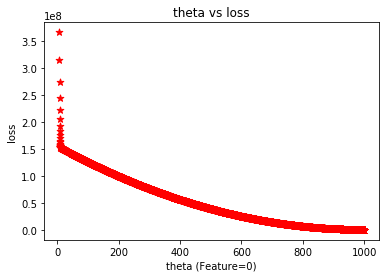

In [76]:
#Loss-theta（θ0 バイアス）  データ：バイアス有り 　モデル：バイアス有り
regr_w_bias.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


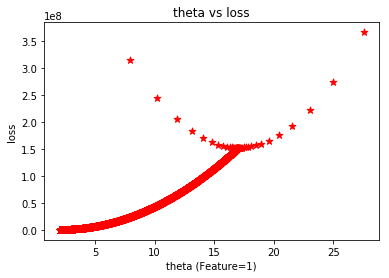

In [77]:
#Loss-theta(θ1 X1）  データ：バイアス有り 　モデル：バイアス有り
regr_w_bias.plot_theta_loss(1)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


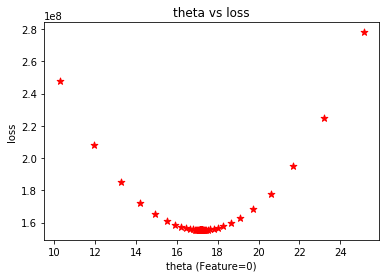

In [78]:
#Loss-theta(θ0 X1）  データ：バイアス有り 　モデル：バイアス無し
#バイアス無し loss-theta
regr_wo_bias.plot_theta_loss(0)

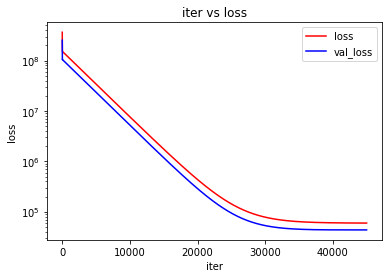

In [79]:
#Loss  データ：バイアス有り 　モデル：バイアス有り
regr_w_bias.plot_loss()

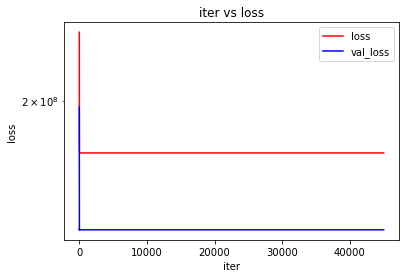

In [80]:
#Loss-theta（θ0 バイアス）  データ：バイアス有り 　モデル：バイアス無し
regr_wo_bias.plot_loss()

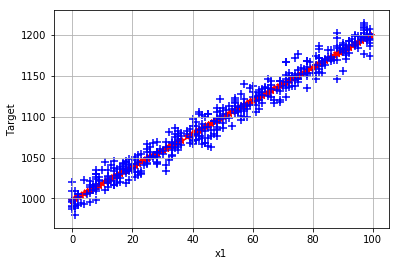

In [81]:
#予測結果  データ：バイアス有り 　モデル：バイアス有り
result = regr_w_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

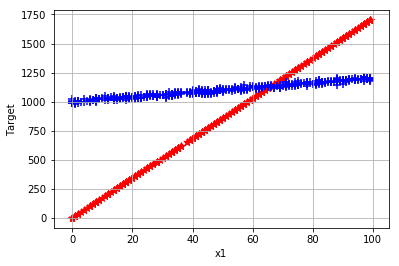

In [82]:
#予測結果  データ：バイアス有り 　モデル：バイアス無し
result = regr_wo_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### バイアス有り・無し検証結果 (バイアス有りデータを使った場合)

1. 学習の様子  
Lossから、バイアス有りの場合は徐々にloss が収束して行くが、バイアス無しの場合はすぐに収束する。   
Thetaのプロットから、極値を見つけた後さらに実際の値へ近づいている。（ように見える。）
2. 学習の結果
データに意図的にバイアスを入れているため、  
バイアス有りの場合は、良いモデル（係数、バイアスが実際のデータに近い ）ができた。  
バイアス無しの場合は、係数だけの調整なので実際のデータとかけ離れた係数に収束してしまった。  
3. 予測結果
バイアス有りの場合は、特徴量X1からターゲットY1を良く予測できている。  
バイアス無しの場合は、特徴量X1からターゲットY1を予測できていない。

#### バイアス無しデータで検証

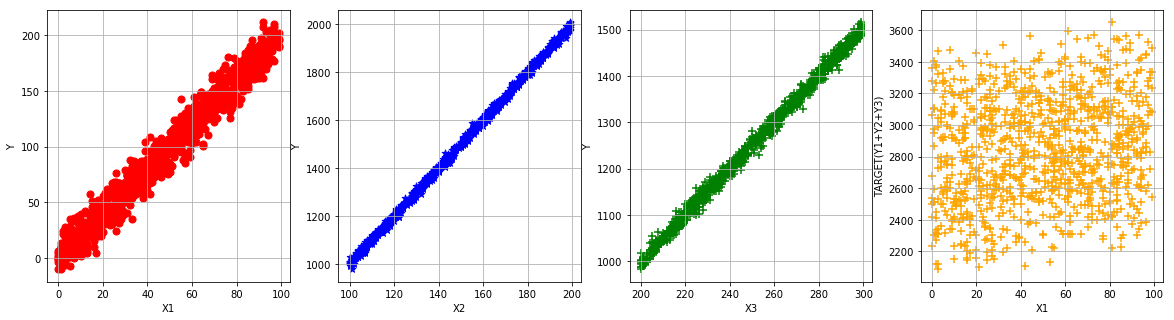

In [83]:
#バイアス無しデータを作る
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
A = 2
B = 0
X1 = np.array(np.random.randint(0, 100, 1000))
Y1 = np.array((X1 * A + B) + 10*np.random.randn(X1.shape[0]))

A = 10
B = 0
X2 = np.array(np.random.randint(100, 200, 1000))
Y2 = np.array((X2 * A + B) + 10*np.random.randn(X2.shape[0]))

A = 5
B = 0
X3 = np.array(np.random.randint(200, 300, 1000))
Y3 = np.array((X3 * A + B) + 10*np.random.randn(X3.shape[0]))
#print(Y1)

data_wo_bias = pd.DataFrame()
data_wo_bias["TARGET"] = Y1 + Y2 + Y3
data_wo_bias["Y1"] = Y1
data_wo_bias["Y2"] = Y2
data_wo_bias["Y3"] = Y3
data_wo_bias["X1"] = X1
data_wo_bias["X2"] = X2
data_wo_bias["X3"] = X3

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
ax1.scatter(data_wo_bias["X1"], data_wo_bias["Y1"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X2')
ax2.set_ylabel('Y')
ax2.scatter(data_wo_bias["X2"], data_wo_bias["Y2"], s=50, marker='*', color='b')             
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X3')
ax3.set_ylabel('Y')
ax3.scatter(data_wo_bias["X3"], data_wo_bias["Y3"], s=50, marker='+', color='green')
ax3 = plt.subplot2grid((1, 4), (0, 3))
ax3.grid(True)
ax3.set_xlabel('X1')
ax3.set_ylabel('TARGET(Y1+Y2+Y3)')
ax3.scatter(data_wo_bias["X1"], data_wo_bias["TARGET"], s=50, marker='+', color='orange')

In [96]:
#とりあえず特徴量X1、ターゲットY1のみで学習を行う。
train_feature, test_feature, train_target, test_target = train_test_split(data_wo_bias[["X1"]].values, data_wo_bias["Y1"].values, test_size=0.4, random_state=None)

In [115]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=12000, lr=0.00058, bias=True, verbose=True)

In [116]:
#bias無し
regr_wo_bias = cLinearRegression.ScratchLinearRegression(num_iter=12000, lr=0.00058, bias=False, verbose=True)

In [117]:
regr_w_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[5]
 [5]]
Theta:
[[0.36835754]
 [1.98681202]]
Feature:
[[ 1  1  1 ...  1  1  1]
 [ 4 46  4 ... 83 49 25]]
Target:
[ 2.60563534e+01  7.41835315e+01  1.49875266e+01  8.32917306e+00
  1.45523355e+02  2.32931295e+01 -3.70500498e+00  6.99016722e+01
  1.27153095e+02  1.18670480e+02  3.98066023e+01  7.94836789e+01
  1.53850578e+02  1.85198693e+02  2.20504527e+01  8.82349276e+01
  6.81793236e+01  1.28367583e+01  1.43691702e+02  9.46210748e+01
  1.73999687e+02  3.94914307e+01  4.47061622e+01  1.50365933e+02
  1.09786330e+02  7.74302465e+01  1.08542616e-01  1.81667444e+02
  1.23424177e+02  1.76923559e+02  8.43387630e+01  5.55213168e+01
  1.31774436e+02  1.38713140e+02  4.23155284e+01  7.24065640e+01
  9.46624881e+01  7.61407684e+01  1.65978616e+02  1.74680546e+02
  7.35092805e+01  3.09707403e+01  9.11808136e+01  5.70602041e+01
  1.37350304e+02  9.55594338e+00  6.01552491e+01  5.30282092e+01
  1.00127973e+02  4.58012469e+01  1.64165255e+02  1.20380303e+02
  9.68280619e+01  8.25027

In [118]:
regr_wo_bias.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[5]]
Theta:
[[1.99248846]]
Feature:
[[ 4 46  4  5 76 20  0 35 66 62 24 43 73 93  7 48 25  2 68 50 87 22 27 79
  56 50  0 91 56 95 50 32 61 69 25 34 48 41 87 93 37 17 59 34 64 13 33 28
  49 24 84 62 43 33 91 32 63  2 88 54 28 83 13 51  4 79 15 75  1 16 70  6
  10 10 81 12 52 75  4 16 31 19 94 63 43 94 24 66 83  8 28 57 83 54 93 78
   2 72 56 88 32 88 76 97 69 94  8  7 83 96 43 81 94  3 42 40 56 40 60 73
  83 55 83 97 79  4 78 66 49 70 49 22 52 14 41 25 99 75 62 83 56 57 48 60
  72 95 97 19 29 19 97 84 48  9 35 55 69 29 35  0 94 62 65 39 79 89 25 98
  25 83 53 61 84 90 88 72 26 55 58 16 51 57 18 27 51 32 16 47 50 21 37 62
  55 48 84 40 46 60 56 48 32 42 10 84 89 92 95 33 26 17 40 92  8 88 87 93
  88 27 37 40 22 24 76 33 70 28 57 21 16 31 41 96 40 67 84 17 64 80  4 31
  85  2 94 11 65 70 51 78 96 35 67 96 65 30 54 20 91 68 70 71 73 85 90  1
  54 92 69  4 94 45 41 37 96 75  5 14  9 15 16 89 13 60 26  5 77 45  4 65
  73 19 70 86 67 38 15 74 57 22 59 62 35 81 29 38 46 92 83 5

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


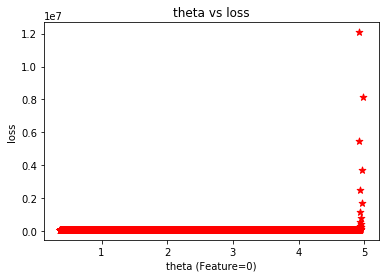

In [119]:
#Loss-theta（θ0 バイアス）  データ：バイアス無し 　モデル：バイアス有り
regr_w_bias.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


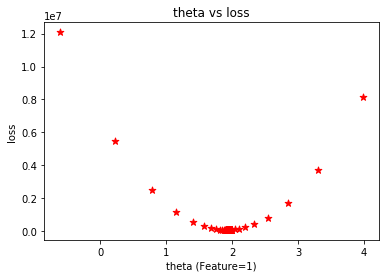

In [120]:
#Loss-theta（θ1 X1）  データ：バイアス無し 　モデル：バイアス有り
regr_w_bias.plot_theta_loss(1)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


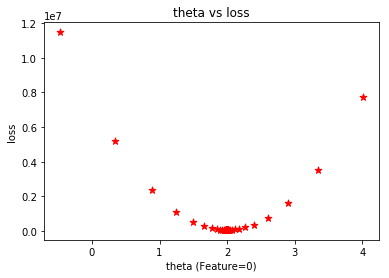

In [121]:
#Loss-theta（θ0 X1）  データ：バイアス無し 　モデル：バイアス無し
regr_wo_bias.plot_theta_loss(0)

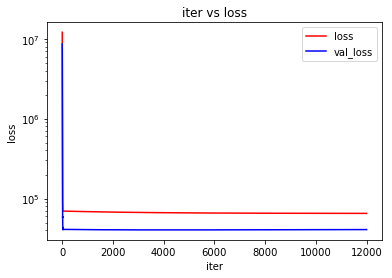

In [122]:
#Loss  データ：バイアス無し 　モデル：バイアス有り
regr_w_bias.plot_loss()

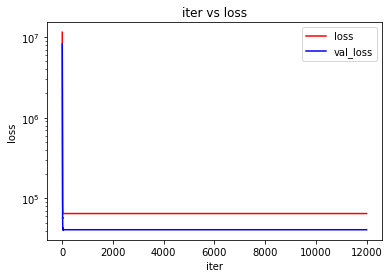

In [123]:
#Loss  データ：バイアス無し 　モデル：バイアス無し
regr_wo_bias.plot_loss()

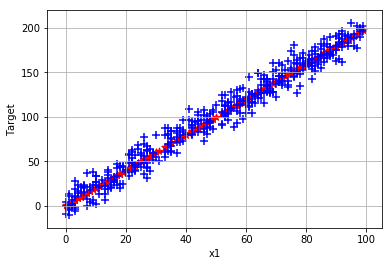

In [124]:
#予測結果 データ：バイアス無し 　モデル：バイアス有り
result = regr_w_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b') 

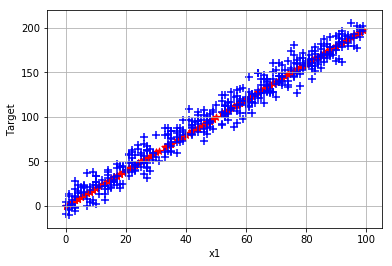

In [125]:
#Loss  データ：バイアス無し 　モデル：バイアス無し
result = regr_wo_bias.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### バイアス無しデータで検証を行なった場合、バイアス有り・無し検証結果
1. バイアス有り無しで大きな差はなかったが、バイアス有りの方が若干値の収束が緩やか（バイアス有りデータで検証を行なった場合と同じで）

#### 【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

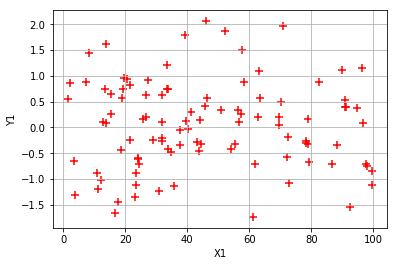

In [46]:
#テストデータを作る
X1 = np.array(0.1*np.random.randint(0, 1000, 100))
Y1 = np.array(((np.sin(X1)) + 0.5*np.random.randn(X1.shape[0])))

data_sin = pd.DataFrame()
data_sin["TARGET"] = Y1
data_sin["Y1"] = Y1
data_sin["X1"] = X1

plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.scatter(data_sin["X1"], data_sin["Y1"], s=50, marker='+', color='r') 

In [47]:
#多項式データを作る
data_sin["X1_2"] = (data_sin["X1"].values)**2
data_sin["X1_3"] = (data_sin["X1"].values)**3
data_sin["X1_4"] = (data_sin["X1"].values)**4
data_sin["X1_5"] = (data_sin["X1"].values)**5

train_feature, test_feature, train_target, test_target = train_test_split(data_sin[["X1", "X1_2","X1_3"]].values, data_sin["TARGET"].values, test_size=0.4, random_state=None)

In [48]:
regr = cLinearRegression.ScratchLinearRegression(num_iter=450000, lr=1e-15, bias=False, verbose=True)

In [49]:
regr.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[5]
 [4]
 [6]]
Theta:
[[ 4.99915636]
 [ 3.92985311]
 [-0.04570003]]
Feature:
[[3.97000000e+01 8.26000000e+01 5.62000000e+01 9.11000000e+01
  3.78000000e+01 2.66000000e+01 1.08000000e+01 4.37000000e+01
  1.34000000e+01 9.07000000e+01 3.57000000e+01 9.64000000e+01
  9.94000000e+01 8.68000000e+01 6.96000000e+01 2.14000000e+01
  1.38000000e+01 7.92000000e+01 4.13000000e+01 3.19000000e+01
  9.65000000e+01 2.32000000e+01 1.30000000e+01 1.53000000e+01
  5.54000000e+01 7.10000000e+01 1.22000000e+01 1.85000000e+01
  6.36000000e+01 7.28000000e+01 1.90000000e+01 2.68000000e+01
  7.84000000e+01 4.43000000e+01 4.63000000e+01 4.58000000e+01
  2.20000000e+00 3.10000000e+01 2.06000000e+01 3.50000000e+00
  9.46000000e+01 9.24000000e+01 2.75000000e+01 3.34000000e+01
  4.33000000e+01 3.18000000e+01 1.94000000e+01 1.39000000e+01
  7.25000000e+01 1.76000000e+01 7.02000000e+01 5.83000000e+01
  1.54000000e+01 3.78000000e+01 8.83000000e+01 3.80000000e+00
  1.67000000e+01 7.22000000e+01 1.95000

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


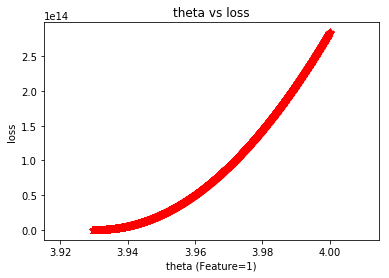

In [50]:
regr.plot_theta_loss(1)

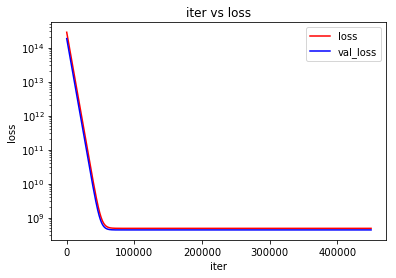

In [51]:
regr.plot_loss()

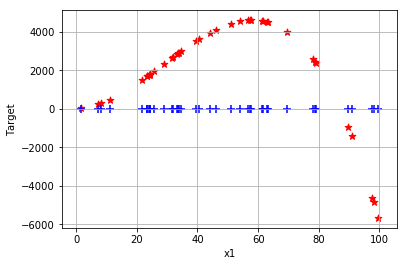

In [52]:
result = regr.predict(test_feature)

plt.grid(True)
plt.xlabel('x1')
plt.ylabel('Target')
plt.scatter(test_feature[:,0], result, s=50, marker='*', color='r') 
plt.scatter(test_feature[:,0], test_target, s=50, marker='+', color='b')

#### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

線形回帰モデルでは、学習データから目的変数と（特徴量ベクトル * 係数ベクトルθ）のMSEが最小になるθを求めモデルを構築する。MSE最小になるθを求めるため最急降下法を用いる。  
最急降下法の勾配はMSEのθに対する微分で求められる。最急降下法の式は以下のように定義される。  
　　$ \theta_j = \theta_j - \frac{\partial}{\partial \theta_j} J(\theta) $   
$J(\theta)$はMSEなので、MSEを代入すると  
　　$ \theta_j = \theta_j - \alpha \times \frac{\partial}{\partial \theta_j} (\frac{1}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  
となる。  
$(h_\theta(x^{(i)}) - y^{(i)})$を$T_i$と置いて式の微分部分を計算すると  
  
　　$ \frac{\partial h(\theta)}{\partial \theta_j} = \frac{\partial h(\theta)}{\partial T} \frac{\partial T(\theta)}{\partial \theta_j} $  
　　$ \frac{\partial h(\theta)}{\partial \theta_j}= 2(\frac{1}{m}) \sum_{i=1}^m T_i \frac{\partial h(\theta)}{\partial \theta}$  
ここで、$ \frac{\partial h(\theta)}{\partial \theta} $　は、$ \frac{\partial}{\partial \theta_j}(\theta_0*x_0 + \theta_1*x_1...\theta_j*x_j) = x_j$  
なので、最急降下法の式は、  
　　$ \theta_j = \theta_j - (\frac{\alpha}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j $  
となる。

#### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

線形回帰では、予測結果（モデル）と目的変数（入力データ）の差が最小になるθを各説明変数ベクトル毎に求めている。モデルとデータの差はMSE（予測結果とデータの差の２乗）によって評価されるが、線形回帰モデルでは予測結果は説明変数の１次式で表されるため、θに対してMSEをプロットすると必ず下に凸の２乗曲線になる。これは谷が１つのデータであるため局所解は存在せず最急降下法を用いると必ず最適解が求まる。

#### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か

### その他　多重共線性について調べる。
数式から、相関係数が高い特徴量を選んでもあまり意味がないことはわかったが、それがどのようにモデルに悪影響を与えるかはよくわからなかった。
適当なデータセットを用意し実際に学習を行ってみて検証を行う。

1. 相関係数が0.9, 0.5, 0.1の特徴量X1, X2を作る。
2. X1, X2に対しY1,Y2を生成（適当なy=aX+bで）
3. Target=Y1+Y2、特徴量X1,X2のデータセットを用意

In [220]:
#適当な分散を持つ、線形な(Y1,X1),(Y2,X2),(Y3,X3)を生成
X1X2_range = [100, 100]
X1X2_09_cov = [[100.0, 90.0], [90.0, 100.0]]
X1X2_05_cov = [[100.0, 50.0], [50.0, 100.0]]
X1X2_01_cov = [[100.0, 10.0], [10.0, 100.0]]

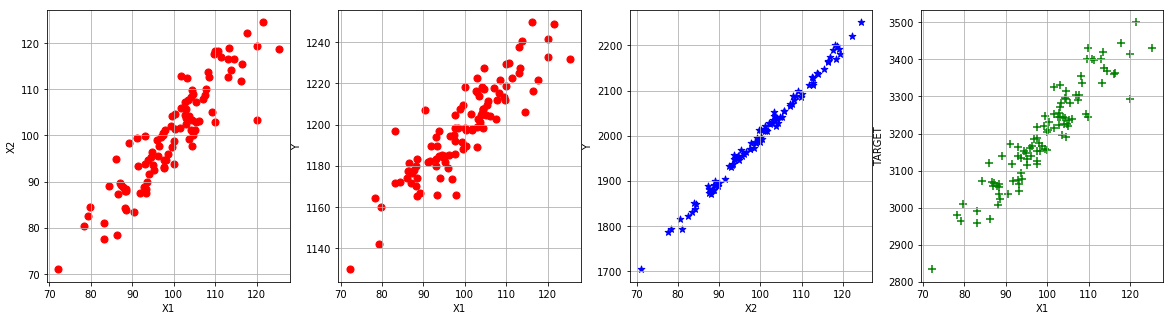

In [225]:
X1X2 = np.random.multivariate_normal(X1X2_range, X1X2_09_cov, 100)

A=2
B=1000
Y1 = np.array((X1X2[:,0] * A + B) + 10*np.random.randn(X1X2[:,0].shape[0]))
A=10
B=1000
Y2 = np.array((X1X2[:,1] * A + B) + 10*np.random.randn(X1X2[:,1].shape[0]))

data_09_cov = pd.DataFrame()
data_09_cov["TARGET"] = Y1 + Y2
data_09_cov["Y1"] = Y1
data_09_cov["Y2"] = Y2
data_09_cov["X1"] = X1X2[:,0]
data_09_cov["X2"] = X1X2[:,1]

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(data_09_cov["X1"], data_09_cov["X2"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
ax2.scatter(data_09_cov["X1"], data_09_cov["Y1"], s=50, marker='o', color='r') 
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X2')
ax3.set_ylabel('Y')
ax3.scatter(data_09_cov["X2"], data_09_cov["Y2"], s=50, marker='*', color='b')             
ax4 = plt.subplot2grid((1, 4), (0, 3))
ax4.grid(True)
ax4.set_xlabel('X1')
ax4.set_ylabel('TARGET')
ax4.scatter(data_09_cov["X1"], data_09_cov["TARGET"], s=50, marker='+', color='green')

In [226]:
train_feature, test_feature, train_target, test_target = train_test_split(data_09_cov[["X1", "X2"]].values, data_09_cov["TARGET"].values, test_size=0.4, random_state=None)

In [227]:
regr_09_cov = cLinearRegression.ScratchLinearRegression(num_iter=6000000, lr=0.00004, bias=True, verbose=True)

In [228]:
regr_09_cov.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[1]
 [2]
 [6]]
Theta:
[[1841.89327279]
 [   3.89729052]
 [   9.65473771]]
Feature:
[[  1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.        ]
 [107.08216178  97.44829233 103.04458365  93.02303947  88.55927001
  100.18394184  98.2384896  113.051771    79.26327892 104.48371232
   79.81162351 102.83065773  87.00077024  88.23683

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


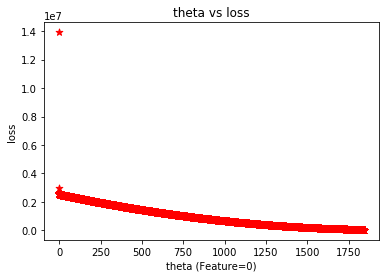

In [229]:
regr_09_cov.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


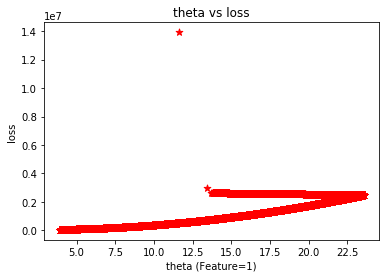

In [230]:
regr_09_cov.plot_theta_loss(1)

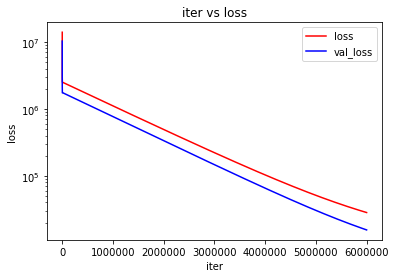

In [231]:
regr_09_cov.plot_loss()

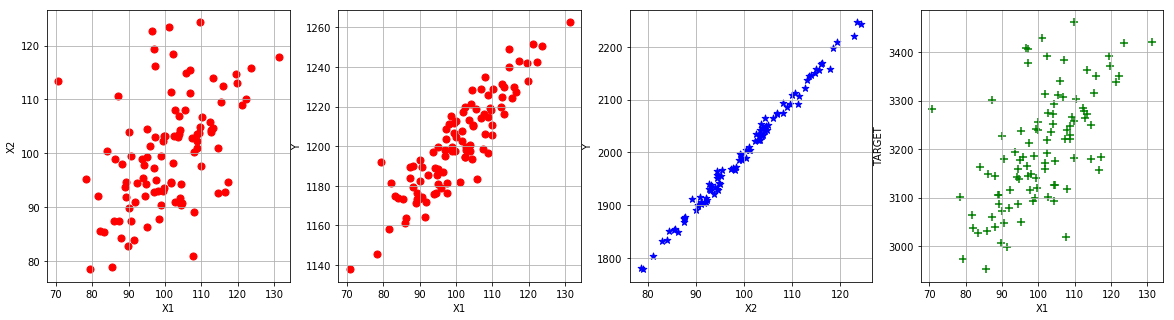

In [232]:
X1X2 = np.random.multivariate_normal(X1X2_range, X1X2_05_cov, 100)

A=2
B=10
Y1 = np.array((X1X2[:,0] * A + B) + 10*np.random.randn(X1X2[:,0].shape[0]))
A=2
B=10
Y2 = np.array((X1X2[:,1] * A + B) + 10*np.random.randn(X1X2[:,1].shape[0]))

data_05_cov = pd.DataFrame()
data_05_cov["TARGET"] = Y1 + Y2
data_05_cov["Y1"] = Y1
data_05_cov["Y2"] = Y2
data_05_cov["X1"] = X1X2[:,0]
data_05_cov["X2"] = X1X2[:,1]

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(data_05_cov["X1"], data_05_cov["X2"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
ax2.scatter(data_05_cov["X1"], data_05_cov["Y1"], s=50, marker='o', color='r') 
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X2')
ax3.set_ylabel('Y')
ax3.scatter(data_05_cov["X2"], data_05_cov["Y2"], s=50, marker='*', color='b')             
ax4 = plt.subplot2grid((1, 4), (0, 3))
ax4.grid(True)
ax4.set_xlabel('X1')
ax4.set_ylabel('TARGET')
ax4.scatter(data_05_cov["X1"], data_05_cov["TARGET"], s=50, marker='+', color='green')

In [233]:
train_feature, test_feature, train_target, test_target = train_test_split(data_05_cov[["X1", "X2"]].values, data_05_cov["TARGET"].values, test_size=0.4, random_state=None)

In [234]:
regr_05_cov = cLinearRegression.ScratchLinearRegression(num_iter=6000000, lr=0.00004, bias=True, verbose=True)

In [235]:
regr_05_cov.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[2]
 [3]
 [1]]
Theta:
[[1644.78790397]
 [   3.85724571]
 [  11.65569274]]
Feature:
[[  1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.        ]
 [101.7153354  119.70053143  86.20384456  99.87781252  83.32938798
   94.45996647  98.04407648  91.82889406  95.15502861 101.79274922
   98.97163623 117.31987499 104.60813857  96.93693

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


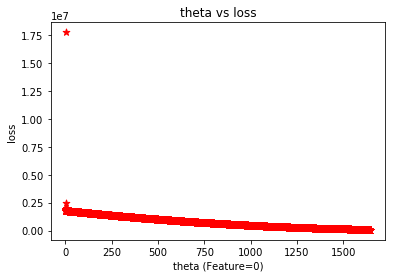

In [236]:
regr_05_cov.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


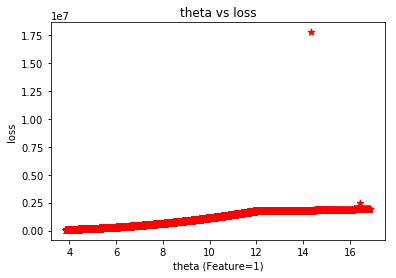

In [237]:
regr_05_cov.plot_theta_loss(1)

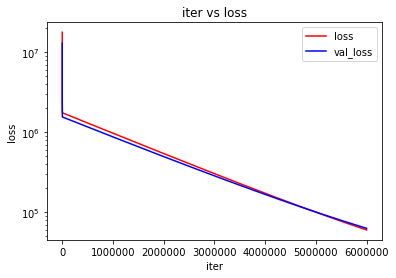

In [238]:
regr_05_cov.plot_loss()

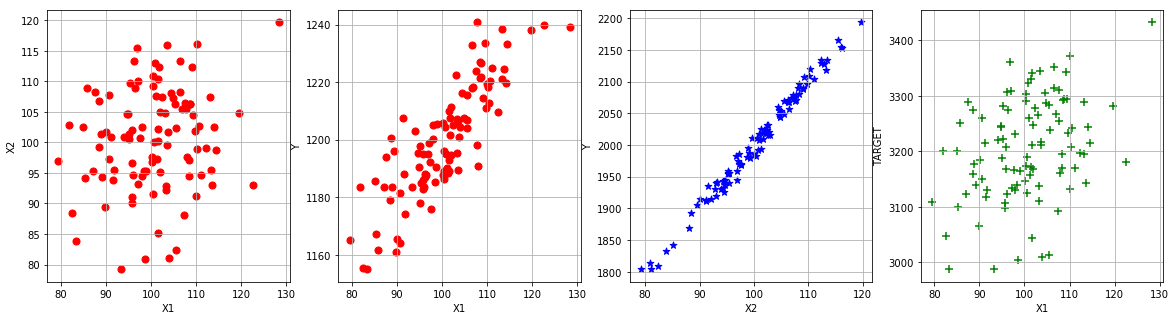

In [239]:
X1X2 = np.random.multivariate_normal(X1X2_range, X1X2_01_cov, 100)

A=2
B=1000
Y1 = np.array((X1X2[:,0] * A + B) + 10*np.random.randn(X1X2[:,0].shape[0]))
A=10
B=1000
Y2 = np.array((X1X2[:,1] * A + B) + 10*np.random.randn(X1X2[:,1].shape[0]))

data_01_cov = pd.DataFrame()
data_01_cov["TARGET"] = Y1 + Y2
data_01_cov["Y1"] = Y1
data_01_cov["Y2"] = Y2
data_01_cov["X1"] = X1X2[:,0]
data_01_cov["X2"] = X1X2[:,1]

fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 4), (0, 0))
ax1.grid(True)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(data_01_cov["X1"], data_01_cov["X2"], s=50, marker='o', color='r') 
ax2 = plt.subplot2grid((1, 4), (0, 1))
ax2.grid(True)
ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
ax2.scatter(data_01_cov["X1"], data_01_cov["Y1"], s=50, marker='o', color='r') 
ax3 = plt.subplot2grid((1, 4), (0, 2))
ax3.grid(True)
ax3.set_xlabel('X2')
ax3.set_ylabel('Y')
ax3.scatter(data_01_cov["X2"], data_01_cov["Y2"], s=50, marker='*', color='b')             
ax4 = plt.subplot2grid((1, 4), (0, 3))
ax4.grid(True)
ax4.set_xlabel('X1')
ax4.set_ylabel('TARGET')
ax4.scatter(data_01_cov["X1"], data_01_cov["TARGET"], s=50, marker='+', color='green')

In [240]:
train_feature, test_feature, train_target, test_target = train_test_split(data_01_cov[["X1", "X2"]].values, data_01_cov["TARGET"].values, test_size=0.4, random_state=None)

In [241]:
regr_01_cov = cLinearRegression.ScratchLinearRegression(num_iter=6000000, lr=0.00004, bias=True, verbose=True)

In [242]:
regr_01_cov.fit(train_feature, train_target, test_feature, test_target)

Initial theta:
[[1]
 [9]
 [5]]
Theta:
[[1353.27483339]
 [   4.68479579]
 [  13.70751539]]
Feature:
[[  1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.        ]
 [ 91.53216773  90.6188371  107.96785525  96.0775414   90.56850525
  101.28152402 110.04406075 106.92190939  84.98207871 101.55806311
  108.6398038   79.42981367 113.18234413 101.98439

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


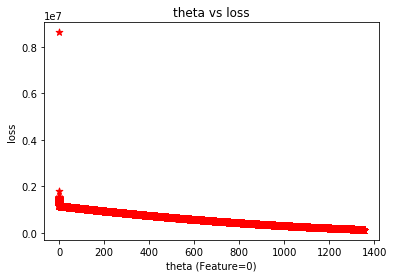

In [243]:
regr_01_cov.plot_theta_loss(0)

/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


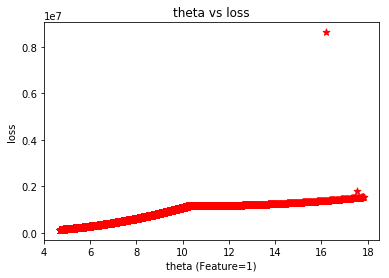

In [244]:
regr_01_cov.plot_theta_loss(1)

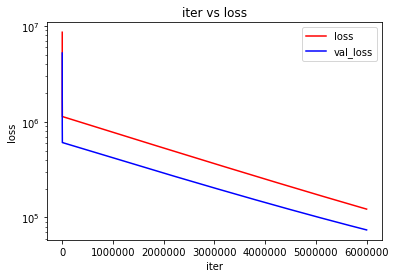

In [245]:
regr_01_cov.plot_loss()